In [110]:
from pathlib import Path

TEST_FOLDER = Path("tests")
SRC_FOLDER = Path("src")
BIN_FOLDER = Path("bin")
BIN_FILE = BIN_FOLDER / "TSP_greedy.exe"
TIMES_FILE = Path("results.csv")
NO_POINTS = [10]
POINT_LIMIT = 100
print(TEST_FOLDER.absolute())

f:\Programowanie\Studia\OptymalizacjaKombinatoryczna\tests


In [111]:
import subprocess

def compile_src(filepath : Path, BIN_FOLDER : Path):
    cmd = ["g++", filepath, "-std=c++17","-o", f"{BIN_FOLDER / filepath.stem}.exe" ]
    p = subprocess.run(cmd, capture_output=True)
    print("Compiled: ", p.returncode, p.stdout.decode('utf-8'), p.stderr.decode('utf-8'))

for src_path in SRC_FOLDER.glob("*.cpp"):
    compile_src(src_path, BIN_FOLDER)



Compiled:  0  


In [112]:
import random

def generate_test(test_folder:Path, number):

    points = []
    for _ in range(number):
        x = random.uniform(0, POINT_LIMIT)
        y = random.uniform(0, POINT_LIMIT)
        
        while (x,y) in points:
            x = random.uniform(0, POINT_LIMIT)
            y = random.uniform(0, POINT_LIMIT)
            
        points.append((x,y))
    #print(points)
    #print(points)

    with open(test_folder / f"test_{number}.txt", 'w') as f:
        f.write(f"{number}\n")
        for (x, y) in points:
            f.write(f"{x} {y}\n")


for test_file in TEST_FOLDER.glob("*.txt"):
    test_file.unlink()

for points in NO_POINTS: 
    generate_test(TEST_FOLDER, points)



In [113]:
import csv

def run_test(test_path:Path):
    cmd = [str(BIN_FILE)]
    process = subprocess.run(cmd,capture_output=True, text=True, input=str(test_path.absolute()))
    return process.stdout.split()

with open(TIMES_FILE, 'w', newline='') as times_file:
    writer = csv.writer(times_file, delimiter=',')
    for test_file in TEST_FOLDER.glob("*.txt"):
        nodes = test_file.stem.split("_")[1]
        print("Nodes:", nodes)
        output = run_test(test_file)
        #print(output)
        writer.writerow([nodes,*output])
        

Nodes: 10


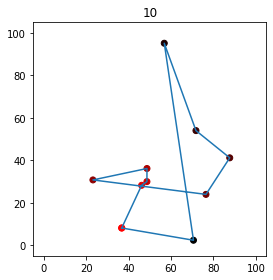

In [114]:
import matplotlib.pyplot as plt
import numpy as np

with open(TIMES_FILE, 'r') as csv_file:
    csv_data = list(csv.reader(csv_file, delimiter=','))

first_test = csv_data[0]

for test in csv_data:

    data = {}
    data["nodes"] = int(test[0])
    data["distance"] = float(test[1])
    data["traveled_nodes"] = []

    for row in test[2:]:
        x, y = row.split(';')
        data["traveled_nodes"].append((float(x), float(y)))

    nodes = data["nodes"]
    red = np.linspace(1, 0, nodes)

    red = np.append(red, [1,0,0])

    colors = list(zip(red, np.zeros(nodes+1), np.zeros(nodes+1)))
    #print(colors)

    x_cords, y_cords = zip(*data["traveled_nodes"])
    #print(x_cords)
    #print(y_cords)

    fig, ax = plt.subplots()
    ax.set(xlim=(-5, POINT_LIMIT+5), ylim=(-5, POINT_LIMIT+5))
    
    
    ax.scatter(x_cords, y_cords, c=colors)
    ax.plot(x_cords, y_cords)

    
    ax.set_aspect('equal', 'box')
    ax.set_title(data["nodes"])
    fig.tight_layout()


plt.show()